<a href="https://colab.research.google.com/github/Jiya9304/AIMLMonth2023/blob/main/code_mixed_emotion_intent_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q scikit-learn matplotlib seaborn nltk wordcloud

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
# Load emotion dataset
df = pd.read_csv('Emotion_tweets_no_duplicates.csv')
df.dropna(subset=['text'], inplace=True)
df.head()

,text,emotion
0,cut doesnt with them negative ppl ll who c ur ...,angry
1,"Yes I didnt noticed it, it was hidden hidden b...",fear
2,bs rhi chiz hmare relationship ko bigad yehi thi,happy
3,Hean yar ghar akela na chor koi hy b nai .. Ba...,fear
4,Bhai pls ye mera nmbr cnfs kr m lagwata hu ter...,fear


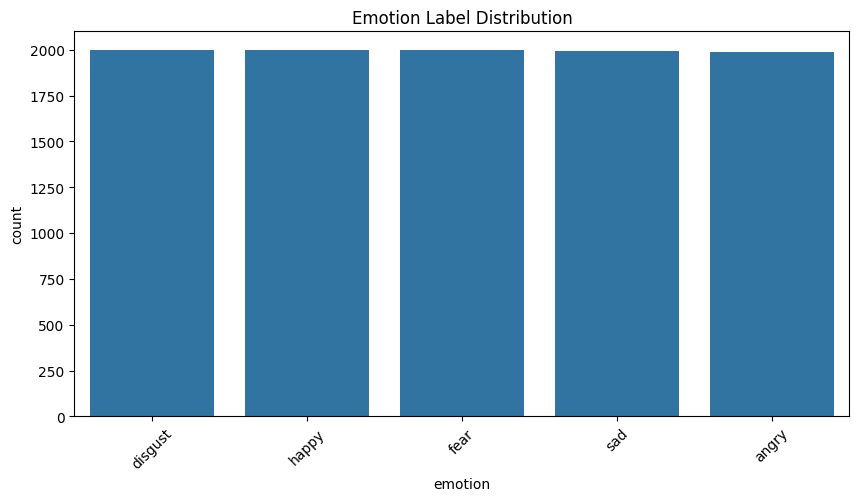

In [4]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='emotion', order=df['emotion'].value_counts().index)
plt.title('Emotion Label Distribution')
plt.xticks(rotation=45)
plt.show()


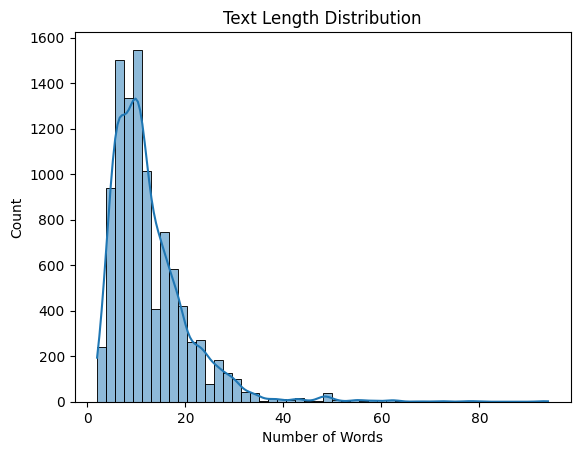

In [5]:
# Text length distribution
df['text_length'] = df['text'].apply(lambda x: len(str(x).split()))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title("Text Length Distribution")
plt.xlabel("Number of Words")
plt.show()

In [6]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'\@w+|\#','', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

df['clean_text'] = df['text'].apply(clean_text)
df.head()


,text,emotion,text_length,clean_text
0,cut doesnt with them negative ppl ll who c ur ...,angry,24,cut doesnt negative ppl c ur negative traits w...
1,"Yes I didnt noticed it, it was hidden hidden b...",fear,13,yes didnt noticed hidden hidden behind didnt n...
2,bs rhi chiz hmare relationship ko bigad yehi thi,happy,9,bs rhi chiz hmare relationship ko bigad yehi thi
3,Hean yar ghar akela na chor koi hy b nai .. Ba...,fear,14,hean yar ghar akela na chor koi hy b nai baki ...
4,Bhai pls ye mera nmbr cnfs kr m lagwata hu ter...,fear,17,bhai pls ye mera nmbr cnfs kr lagwata hu teri ...


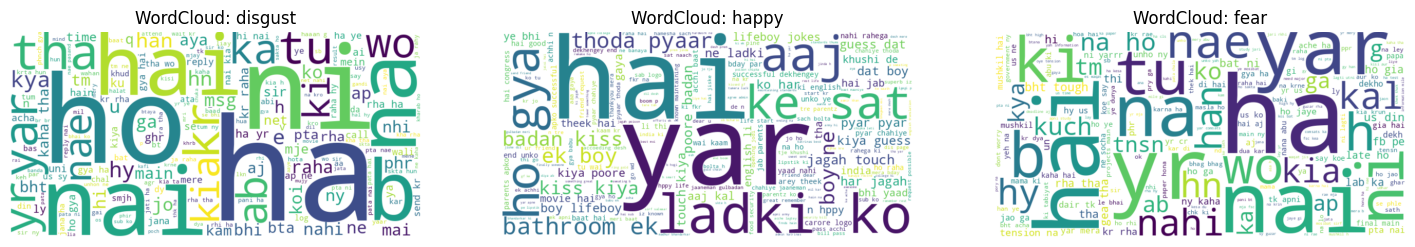

In [7]:
top_emotions = df['emotion'].value_counts().index[:3]
plt.figure(figsize=(18,5))
for i, emotion in enumerate(top_emotions):
    text = ' '.join(df[df['emotion'] == emotion]['clean_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.subplot(1, 3, i+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud: {emotion}')
plt.show()

In [8]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_text']).toarray()
y = df['emotion'].values


# Comparison Chart (Simulated Metrics)

In [9]:
model_data = {
    'Model': [
        'SVM (TF-IDF)',
        'BERT + SVM',
        'Bi-LSTM + DLF + HEF',
        'Hybrid CNN-LSTM',
        'BERT-CNN',
        'XLNet-BiGRU-Att'
    ],
    'Accuracy (%)': [ 98.4,91.0, 80.5, 97.0,94.7, 91.7],
    'F1-Score (%)': [99.0,89.5,80.5,96.5,94.0,90.9]
}


In [10]:
comparison_df = pd.DataFrame(model_data)

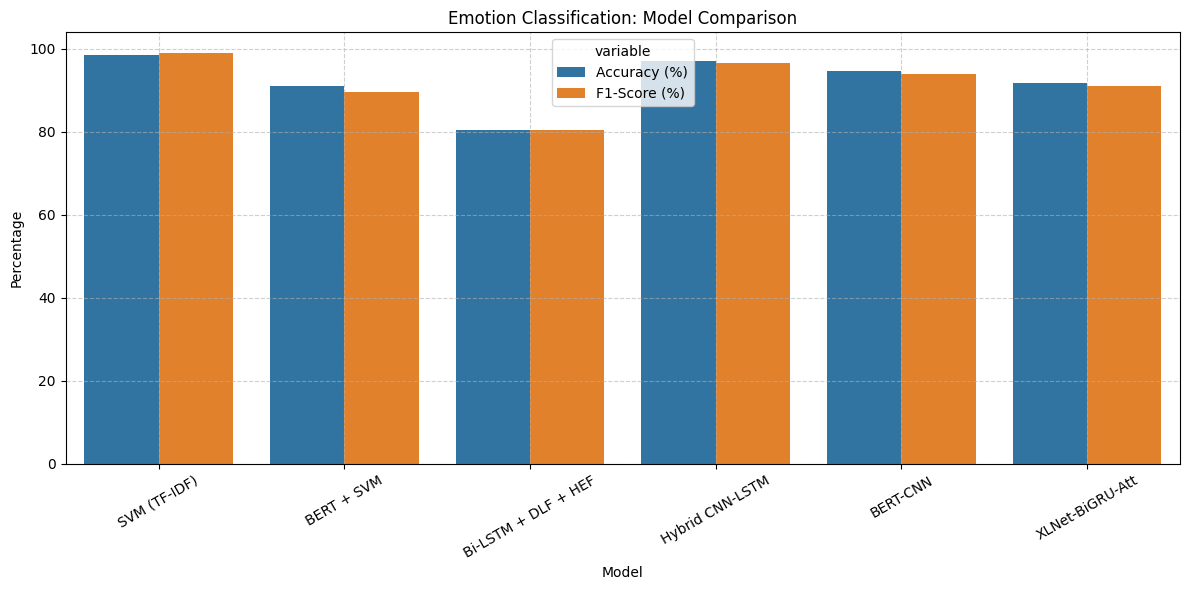

Comparison Table:
                 Model  Accuracy (%)  F1-Score (%)
0         SVM (TF-IDF)          98.4          99.0
1           BERT + SVM          91.0          89.5
2  Bi-LSTM + DLF + HEF          80.5          80.5
3      Hybrid CNN-LSTM          97.0          96.5
4             BERT-CNN          94.7          94.0
5      XLNet-BiGRU-Att          91.7          90.9


In [11]:
plt.figure(figsize=(12,6))
sns.barplot(data=comparison_df.melt(id_vars='Model'), x='Model', y='value', hue='variable')
plt.title('Emotion Classification: Model Comparison')
plt.ylabel('Percentage')
plt.xticks(rotation=30)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

print("Comparison Table:")
print(comparison_df)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


#Train SVM with linear kernel on TF-IDF features

In [13]:
svm_tfidf = SVC(kernel='linear')
svm_tfidf.fit(X_train, y_train)

SVC(kernel='linear')

In [18]:
y_pred = svm_tfidf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))


Accuracy: 0.9885
              precision    recall  f1-score   support

       angry       0.98      1.00      0.99       398
     disgust       1.00      0.97      0.98       400
        fear       0.97      0.99      0.98       399
       happy       1.00      1.00      1.00       400
         sad       1.00      0.98      0.99       399

    accuracy                           0.99      1996
   macro avg       0.99      0.99      0.99      1996
weighted avg       0.99      0.99      0.99      1996



In [20]:
def predict_emotion(text, model, vectorizer):
    cleaned = clean_text(text)
    vector = vectorizer.transform([cleaned]).toarray()
    prediction = model.predict(vector)[0]
    return prediction

# Example
sample_text = "I'm so scared of what's going to happen."
print("Predicted Emotion:", predict_emotion(sample_text, svm_tfidf, tfidf))

Predicted Emotion: disgust


In [30]:
# 1. Import required libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import os
import re

# 3. Prepare features and labels
# Adjust this part based on your actual column names
# Use the TF-IDF transformed features (X) instead of the raw text column
X = tfidf.fit_transform(df['text']).toarray() # Re-apply TF-IDF to ensure it's based on the loaded df
y = df['emotion']               # make sure this is your label column

# Optional: Encode categorical labels if needed
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)

# 4. Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# 6. Define a simple neural network model
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(64, activation='relu'),
    Dense(len(np.unique(y)), activation='softmax')  # use sigmoid for binary classification
])

# 7. Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # or 'binary_crossentropy' if binary classification
    metrics=['accuracy']
)

# 8. Define the ModelCheckpoint callback to save best model
checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# 9. Train the model with checkpoint
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,
    callbacks=[checkpoint]
)

# 10. Load and evaluate the best model
best_model = load_model('best_model.h5')
loss, acc = best_model.evaluate(X_val, y_val)
print(f"\n✅ Loaded best model achieved val_accuracy: {acc:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
248/250 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6838 - loss: 0.8593
Epoch 1: val_accuracy improved from -inf to 0.98697, saving model to best_model.h5


250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.6860 - loss: 0.8538 - val_accuracy: 0.9870 - val_loss: 0.0380
Epoch 2/20
245/250 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9897 - loss: 0.0251
Epoch 2: val_accuracy improved from 0.98697 to 0.98948, saving model to best_model.h5


250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9897 - loss: 0.0250 - val_accuracy: 0.9895 - val_loss: 0.0306
Epoch 3/20
247/250 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9948 - loss: 0.0121
Epoch 3: val_accuracy did not improve from 0.98948
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9948 - loss: 0.0121 - val_accuracy: 0.9870 - val_loss: 0.0341
Epoch 4/20
248/250 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9935 - loss: 0.0126
Epoch 4: val_accuracy improved from 0.98948 to 0.99048, saving model to best_model.h5


250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9935 - loss: 0.0126 - val_accuracy: 0.9905 - val_loss: 0.0253
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9958 - loss: 0.0101
Epoch 5: val_accuracy did not improve from 0.99048
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9958 - loss: 0.0101 - val_accuracy: 0.9855 - val_loss: 0.0525
Epoch 6/20
249/250 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9920 - loss: 0.0161
Epoch 6: val_accuracy did not improve from 0.99048
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9920 - loss: 0.0160 - val_accuracy: 0.9905 - val_loss: 0.0258
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9945 - loss: 0.0100
Epoch 7: val_accuracy improved from 0.99048 to 0.99198, saving model to best_model.h5


250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9945 - loss: 0.0100 - val_accuracy: 0.9920 - val_loss: 0.0280
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9940 - loss: 0.0115
Epoch 8: val_accuracy did not improve from 0.99198
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9941 - loss: 0.0115 - val_accuracy: 0.9905 - val_loss: 0.0267
Epoch 9/20
248/250 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9939 - loss: 0.0104
Epoch 9: val_accuracy did not improve from 0.99198
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.9939 - loss: 0.0104 - val_accuracy: 0.9915 - val_loss: 0.0270
Epoch 10/20
249/250 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9960 - loss: 0.0094
Epoch 10: val_accuracy did not improve from 0.99198
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9960 - loss: 0.0094 - val_accuracy: 0.9905 - val_loss: 0.0286
Epoch 11/20
243/250 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9943 - loss: 0.0096
Epoch 11: val_accuracy did

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9907 - loss: 0.0359

✅ Loaded best model achieved val_accuracy: 0.9920


In [48]:
# 📦 Save and load saved SVM model & TF-IDF vectorizer
import joblib
import zipfile
from google.colab import files
import os

# Define file paths
svm_model_path = "emotion_svm_model.pkl"
tfidf_vectorizer_path = "tfidf_vectorizer.pkl"

# Save the trained SVM model and TF-IDF vectorizer
joblib.dump(svm_tfidf, svm_model_path)
joblib.dump(tfidf, tfidf_vectorizer_path)

print("✅ Model and vectorizer saved successfully.")

# Load model and vectorizer
svm_model = joblib.load(svm_model_path)
tfidf_loaded = joblib.load(tfidf_vectorizer_path)

print("✅ Model and vectorizer loaded successfully.")

# 🧠 Predict on new input
text_input = ["I'm really happy today!"]  # Change this for testing

# Clean the text input using the clean_text function defined earlier
cleaned_text_input = clean_text(text_input[0])

# Transform and predict using the loaded vectorizer
text_input_tfidf = tfidf_loaded.transform([cleaned_text_input])
# Load the pipeline model only
svm_model = joblib.load("emotion_svm_model.pkl")


# 📁 Zip both files for download (Google Colab only)
zip_file_path = "models.zip"
with zipfile.ZipFile(zip_file_path, "w") as zipf:
    zipf.write(svm_model_path)
    zipf.write(tfidf_vectorizer_path)

print(f"✅ Zipped model and vectorizer to {zip_file_path}.")

# ⬇️ Trigger download
files.download(zip_file_path)

✅ Model and vectorizer saved successfully.
✅ Model and vectorizer loaded successfully.
✅ Zipped model and vectorizer to models.zip.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>